<a href="https://colab.research.google.com/github/SatoSim/xray_project/blob/main/CNN_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import requests
import pickle
import numpy as np
import pandas as pd
from PIL import Image

from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import cv2
import os

import shutil
import requests
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



#Preparing Data

In [ ]:
import requests
import zipfile
import pickle

# URL of the zip pickled file
url = "https://github.com/SatoSim/xray/raw/main/df_normal.zip"
# Download the zip file
response = requests.get(url)

if response.status_code == 200:
    # Save the zip file locally
    with open("df_normal.zip", "wb") as f:
        f.write(response.content)

    # Extract the pickled file from the zip archive
    with zipfile.ZipFile("df_normal.zip", "r") as zipf:
        zipf.extractall()

    # Load the pickled data into a DataFrame
    with open("df_normal.pkl", "rb") as f:
        df = pickle.load(f)

    print(df.head())
else:
    print("Failed to download the zip pickled file")

# URL of the zip pickled file
url = "https://github.com/SatoSim/xray/raw/main/df_pneumonia3.zip"
# Download the zip file
response = requests.get(url)

if response.status_code == 200:
    # Save the zip file locally
    with open("df_pneumonia3.zip", "wb") as f:
        f.write(response.content)

    # Extract the pickled file from the zip archive
    with zipfile.ZipFile("df_pneumonia3.zip", "r") as zipf:
        zipf.extractall()

    # Load the pickled data into a DataFrame
    with open("df_pneumonia3.pkl", "rb") as f:
        df_tail = pickle.load(f)

    print(df_tail.head())
else:
    print("Failed to download the zip pickled file")


   Label                                          flattened
0      0  [0.22745098039215686, 0.22745098039215686, 0.2...
1      0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2      0  [0.08627450980392157, 0.08627450980392157, 0.0...
3      0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4      0  [0.0392156862745098, 0.0392156862745098, 0.039...
      Label                                          flattened
2841      1  [0.06666666666666667, 0.06666666666666667, 0.0...
722       1  [0.788235294117647, 0.788235294117647, 0.78823...
1705      1  [0.09411764705882353, 0.09411764705882353, 0.0...
385       1  [0.615686274509804, 0.615686274509804, 0.61568...
985       1  [0.00784313725490196, 0.00784313725490196, 0.0...


In [ ]:
df = pd.concat([df, df_tail], ignore_index=True)

In [ ]:
def reconstruct_image(flattened_array, image_shape=(150, 150, 3)):
    return np.reshape(flattened_array, image_shape)

df['im_arr'] = df['flattened'].apply(reconstruct_image)

In [ ]:
df_shuffled = df.sample(frac=1, random_state=42)
df_shuffled.reset_index(drop=True, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_shuffled['im_arr'], df_shuffled["Label"] , test_size=0.2, random_state=42)

In [ ]:
X_train = np.array(X_train.tolist())
y_train = np.array(y_train.tolist())

X_test = np.array(X_test.tolist())
y_test = np.array(y_test.tolist())

# Creating/Defining CNN model

- Model has a typical structure.

  - Convolutional Layer
  - Pooling Layer
  - Conv layer
  - Pooling
  - Conv layer

- These then feed the information into a neural network which has a relu activation function.
- Which passes its output to a sigmoid function


In [ ]:
def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

input_shape = (150, 150, 3)
model = build_cnn_model(input_shape)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Training Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
80/80 [==============================] - 93s 1s/step - loss: 0.4123 - accuracy: 0.8069 - val_loss: 0.2005 - val_accuracy: 0.9243
Epoch 2/10
80/80 [==============================] - 95s 1s/step - loss: 0.1521 - accuracy: 0.9479 - val_loss: 0.1404 - val_accuracy: 0.9448
Epoch 3/10
80/80 [==============================] - 95s 1s/step - loss: 0.1179 - accuracy: 0.9554 - val_loss: 0.1386 - val_accuracy: 0.9464
Epoch 4/10
80/80 [==============================] - 97s 1s/step - loss: 0.0899 - accuracy: 0.9664 - val_loss: 0.1480 - val_accuracy: 0.9369
Epoch 5/10
80/80 [==============================] - 93s 1s/step - loss: 0.0898 - accuracy: 0.9696 - val_loss: 0.1412 - val_accuracy: 0.9448
Epoch 6/10
80/80 [==============================] - 95s 1s/step - loss: 0.0633 - accuracy: 0.9795 - val_loss: 0.2156 - val_accuracy: 0.9479
Epoch 7/10
80/80 [==============================] - 94s 1s/step - loss: 0.0583 - accuracy: 0.9775 - val_loss: 0.1469 - val_accuracy: 0.9574
Epoch 8/10
80/80 [==

# Evaluation of the model

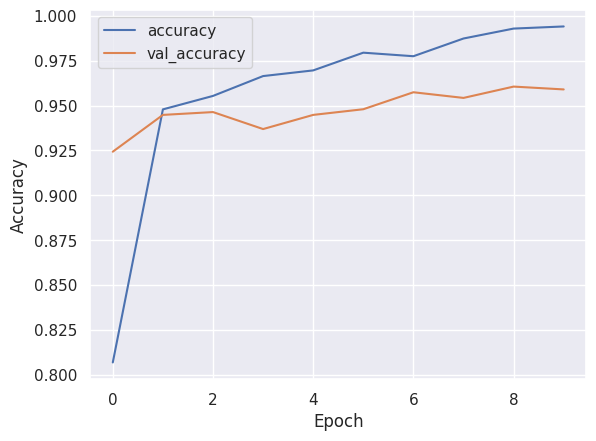

In [ ]:
def plot_training_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_training_history(history)

20/20 [==============================] - 6s 275ms/step
Correctly classified images:


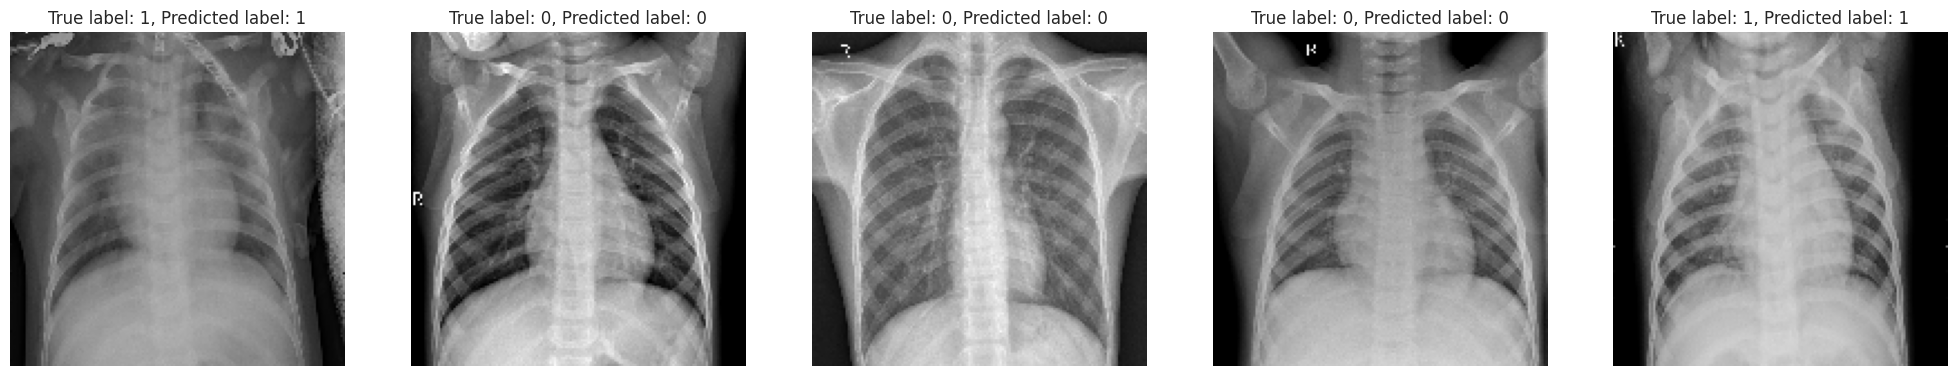

Incorrectly classified images:


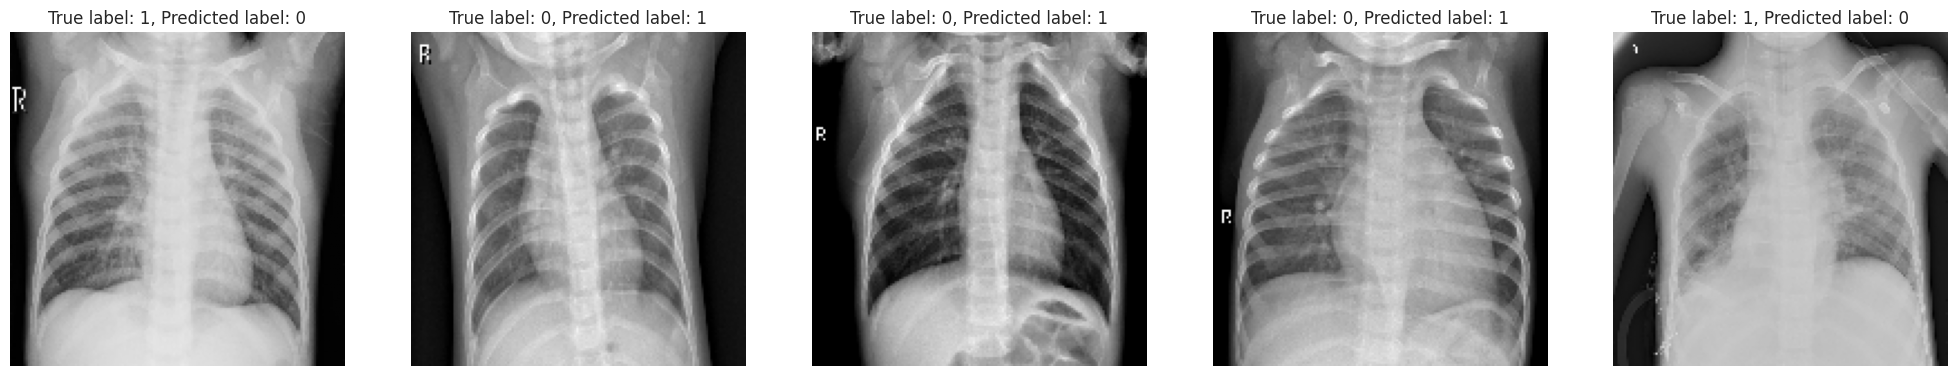

In [ ]:
y_pred = model.predict(X_test)

y_pred_binary = (y_pred > 0.5).astype(int).flatten()

correct_indices = np.where(y_pred_binary == y_test)[0]
incorrect_indices = np.where(y_pred_binary != y_test)[0]

print("Correctly classified images:")
plt.figure(figsize=(25, 15))
for i, idx in enumerate(correct_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True label: {y_test[idx]}, Predicted label: {y_pred_binary[idx]}")
    plt.axis('off')
plt.show()

print("Incorrectly classified images:")
plt.figure(figsize=(25, 15))
for i, idx in enumerate(incorrect_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True label: {y_test[idx]}, Predicted label: {y_pred_binary[idx]}")
    plt.axis('off')
plt.show()


In [ ]:
cm = confusion_matrix(y_test, y_pred_binary)

# Model Eval

In [ ]:
print(cm)

[[316  12]
 [ 14 292]]


In [ ]:
print(classification_report(y_test, y_pred_binary, target_names = ['Normal','Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96       328
   Pneumonia       0.96      0.95      0.96       306

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



In [ ]:
cross_tab = pd.crosstab(y_test, y_pred_binary)
cross_tab


col_0,0,1
row_0,,
0,316,12
1,14,292
